In [1]:
#Import Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
#Load the data

In [4]:
frequency_domain_df = pd.read_csv('frequency_domain_features_train.csv')
non_linear_df = pd.read_csv('heart_rate_non_linear_features_train.csv')
time_domain_df = pd.read_csv('time_domain_features_train.csv')

In [9]:
#Data Visualization

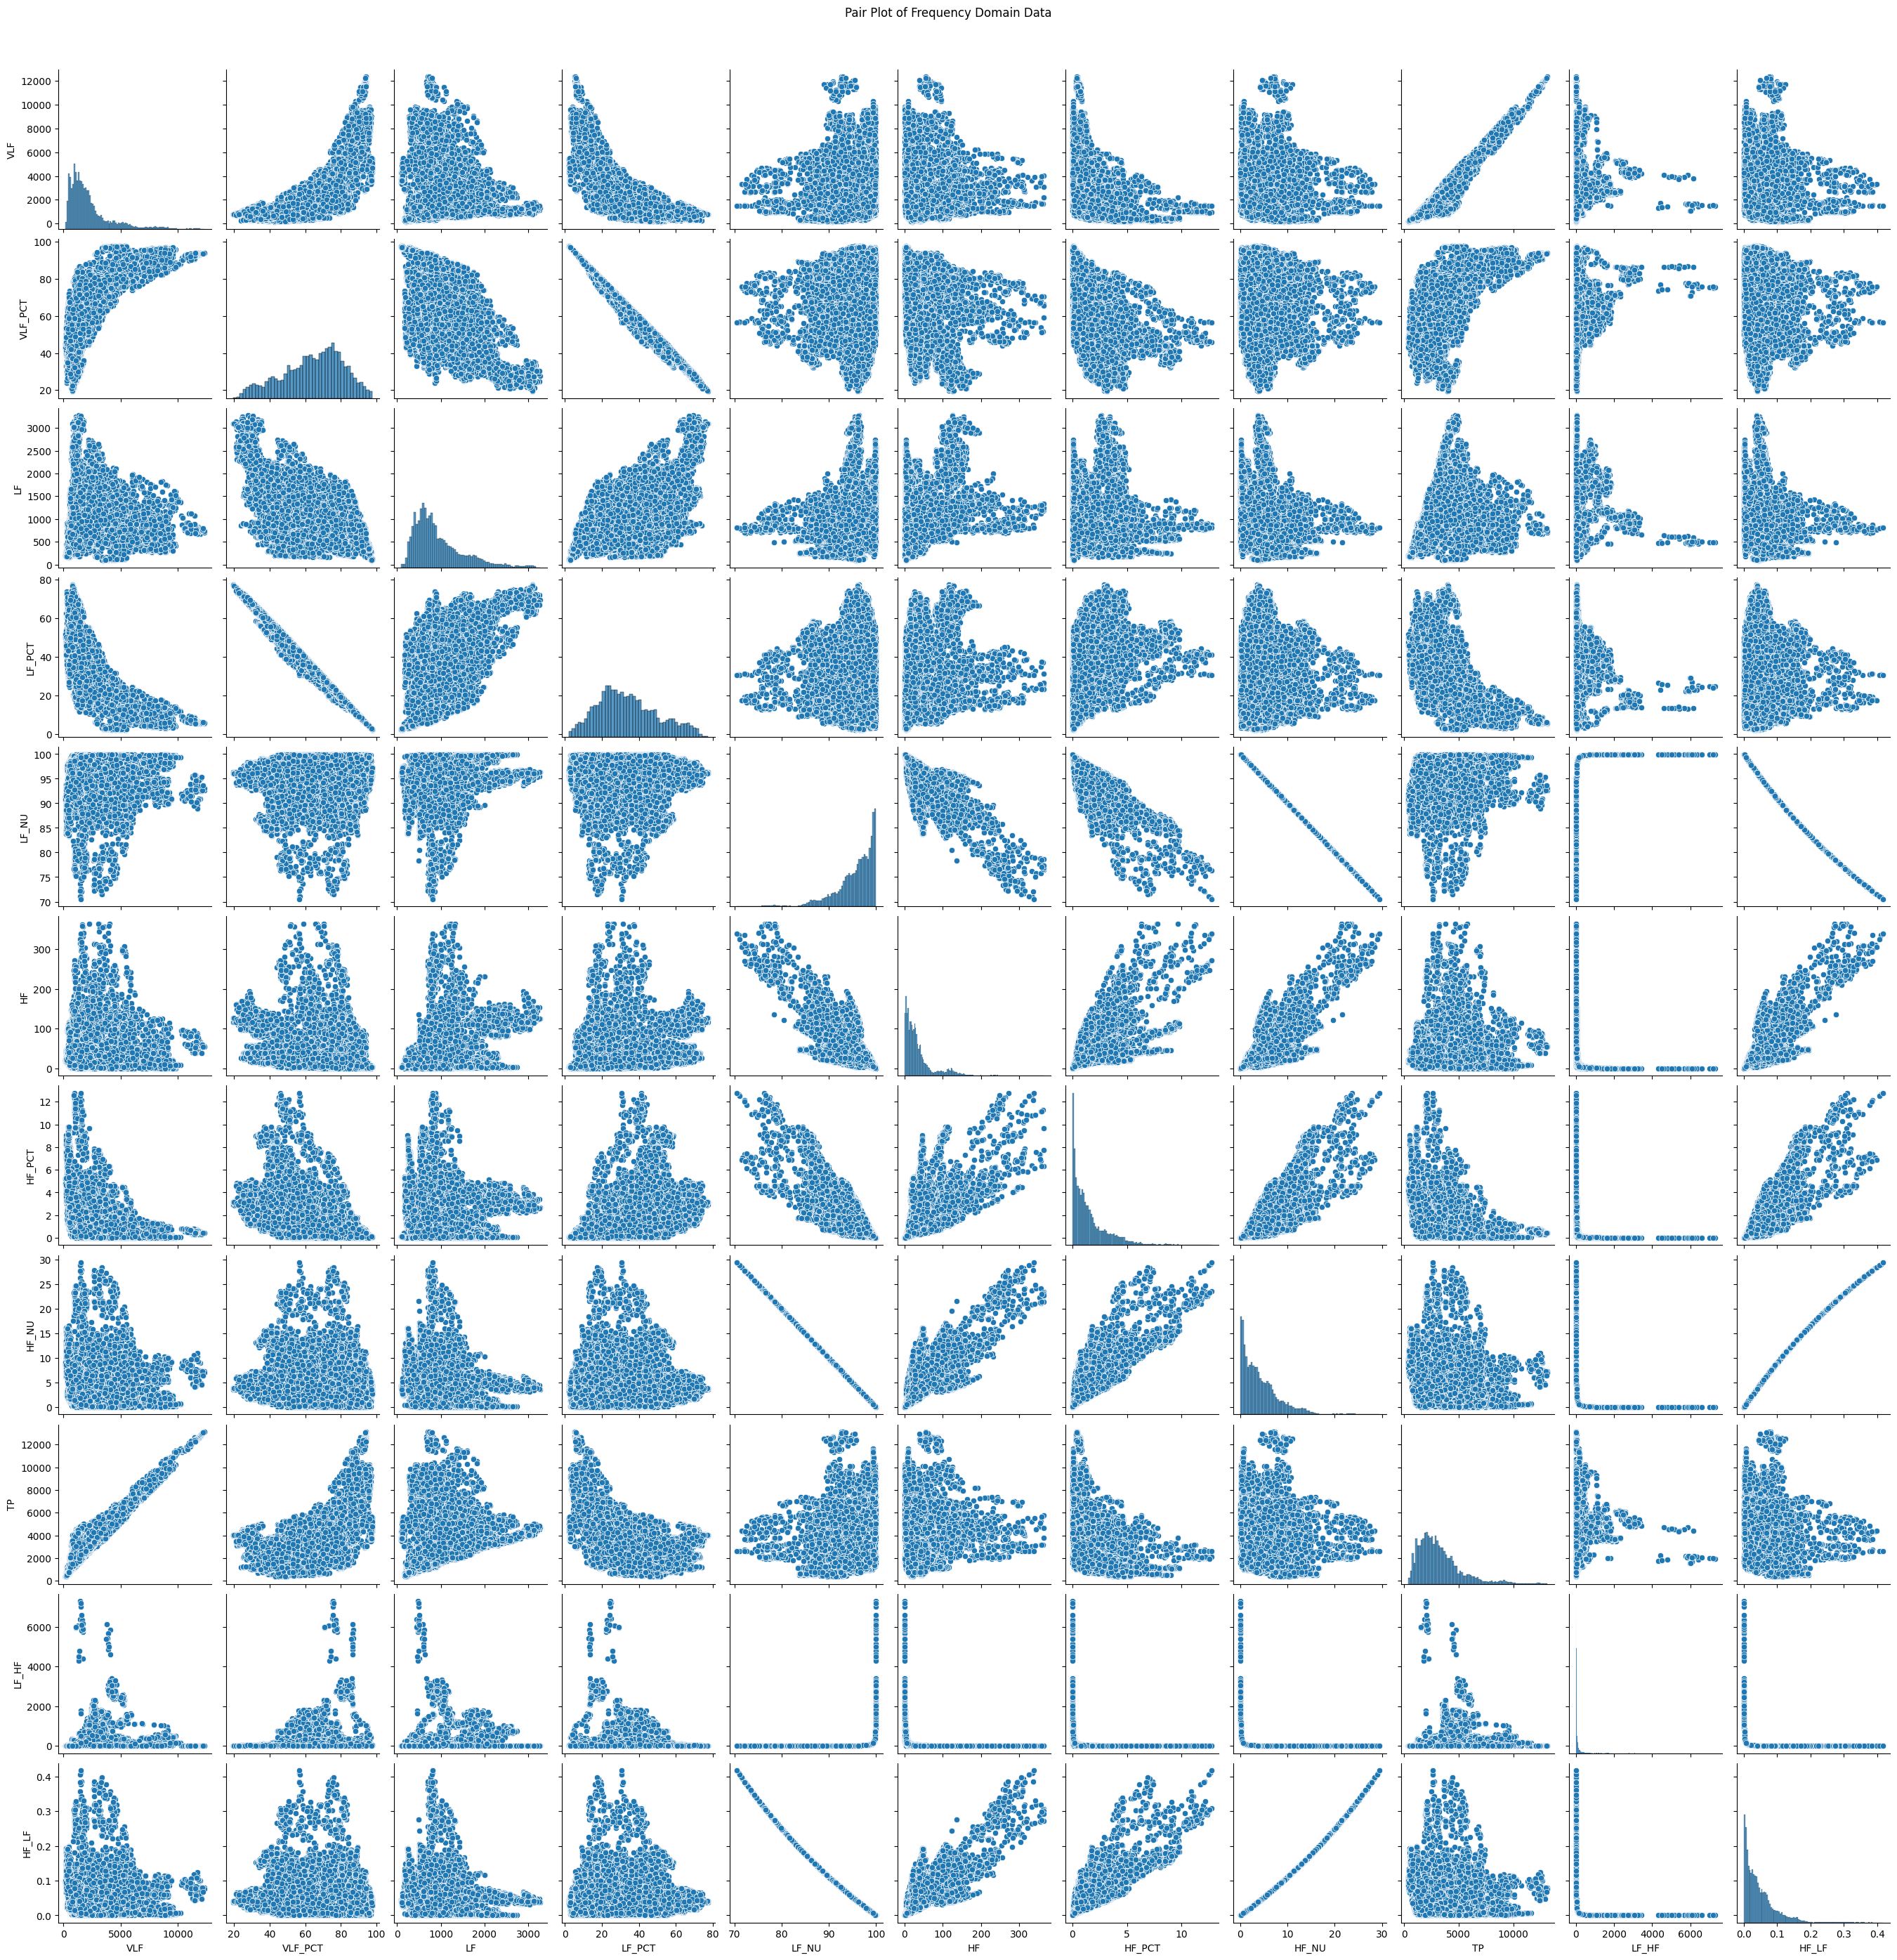

In [10]:
# Frequency Domain Data Visualization
sns.pairplot(frequency_domain_df)
plt.suptitle('Pair Plot of Frequency Domain Data', y=1.02)
plt.show()


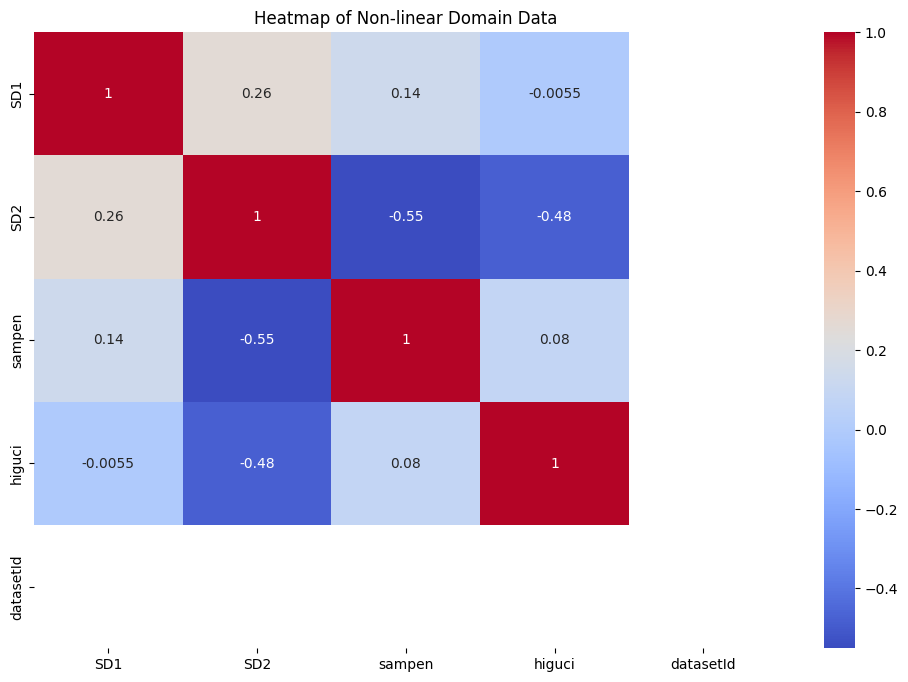

In [15]:
# Filter out non-numeric columns
non_linear_numeric_df = non_linear_df.select_dtypes(include=[float, int])

# Generate heatmap for the numeric columns
plt.figure(figsize=(12, 8))
sns.heatmap(non_linear_numeric_df.corr(), annot=True, cmap='coolwarm')

plt.title('Heatmap of Non-linear Domain Data')
plt.show()


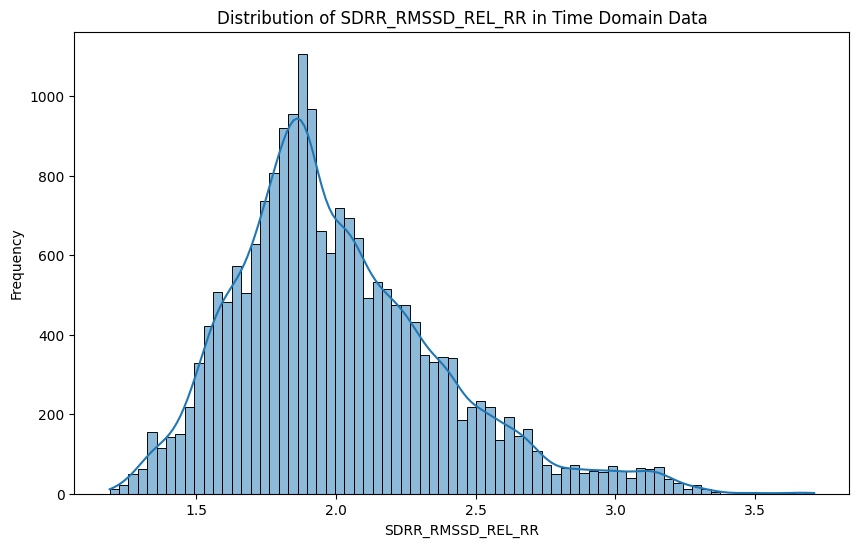

In [16]:
# Time Domain Data Visualization
plt.figure(figsize=(10, 6))
sns.histplot(time_domain_df['SDRR_RMSSD_REL_RR'], kde=True)
plt.title('Distribution of SDRR_RMSSD_REL_RR in Time Domain Data')
plt.xlabel('SDRR_RMSSD_REL_RR')
plt.ylabel('Frequency')
plt.show()

In [17]:
#Print data

In [18]:
print(frequency_domain_df.head())
print(non_linear_df.head())
print(time_domain_df.head())

                                   uuid          VLF    VLF_PCT           LF  \
0  89df2855-56eb-4706-a23b-b39363dd605a  2661.894136  72.203287  1009.249419   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2  2314.265450  76.975728   690.113275   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  1373.887112  51.152225  1298.222619   
3  37eabc44-1349-4040-8896-0d113ad4811f  2410.357408  70.180308  1005.981659   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  1151.177330  43.918366  1421.782051   

      LF_PCT      LF_NU         HF    HF_PCT     HF_NU           TP  \
0  27.375666  98.485263  15.522602  0.421047  1.514737  3686.666157   
1  22.954139  99.695397   2.108525  0.070133  0.304603  3006.487251   
2  48.335104  98.950472  13.769729  0.512671  1.049528  2685.879461   
3  29.290305  98.224706  18.181913  0.529387  1.775294  3434.520980   
4  54.242160  96.720007  48.215822  1.839473  3.279993  2621.175204   

        LF_HF     HF_LF  
0   65.018055  0.015380  
1  327.296635  0.003055  
2   94.280910 

In [19]:
#Checking for missing values

In [20]:
print(frequency_domain_df.isnull().sum())
print(non_linear_df.isnull().sum())
print(time_domain_df.isnull().sum())

uuid       0
VLF        0
VLF_PCT    0
LF         0
LF_PCT     0
LF_NU      0
HF         0
HF_PCT     0
HF_NU      0
TP         0
LF_HF      0
HF_LF      0
dtype: int64
uuid         0
SD1          0
SD2          0
sampen       0
higuci       0
datasetId    0
condition    0
dtype: int64
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
dtype: int64


In [23]:
#Merge frequency_domain and non_linear 

In [24]:
merged_df = pd.merge(frequency_domain_df, non_linear_df, on='uuid')


In [25]:
#Merge time_domain

In [26]:
merged_df = pd.merge(merged_df, time_domain_df, on='uuid')

In [27]:
#Print merge df

In [28]:
print(merged_df.head())

                                   uuid          VLF    VLF_PCT           LF  \
0  89df2855-56eb-4706-a23b-b39363dd605a  2661.894136  72.203287  1009.249419   
1  80c795e4-aa56-4cc0-939c-19634b89cbb2  2314.265450  76.975728   690.113275   
2  c2d5d102-967c-487d-88f2-8b005a449f3e  1373.887112  51.152225  1298.222619   
3  37eabc44-1349-4040-8896-0d113ad4811f  2410.357408  70.180308  1005.981659   
4  aa777a6a-7aa3-4f6e-aced-70f8691dd2b7  1151.177330  43.918366  1421.782051   

      LF_PCT      LF_NU         HF    HF_PCT     HF_NU           TP  ...  \
0  27.375666  98.485263  15.522602  0.421047  1.514737  3686.666157  ...   
1  22.954139  99.695397   2.108525  0.070133  0.304603  3006.487251  ...   
2  48.335104  98.950472  13.769729  0.512671  1.049528  2685.879461  ...   
3  29.290305  98.224706  18.181913  0.529387  1.775294  3434.520980  ...   
4  54.242160  96.720007  48.215822  1.839473  3.279993  2621.175204  ...   

       KURT      SKEW  MEAN_REL_RR  MEDIAN_REL_RR  SDRR_REL_RR